# How to classify MNIST digits with a simple neural network architecture?

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt

2025-02-15 17:27:45.565605: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-15 17:27:45.571273: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-15 17:27:45.626044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-15 17:27:45.687135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739636865.738342   16537 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739636865.75


Load the MNIST data (or downlaod it if not already done) 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Prepare and convert the data

In [4]:
np.set_printoptions(linewidth=150)   # Enlarge the line the see all the element in one column
print(x_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20   

In [5]:
print(y_train[42])

7


In [6]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
# Flatten the images
image_vector_size = 28*28   # = 784 
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [7]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape)

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [8]:
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:10]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:10])

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9 2 1 3 1 4]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
print(y_train[42])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-15 17:27:49.820906: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile, train and evaluate the model

In [11]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5528 - loss: 1.5704 - val_accuracy: 0.8635 - val_loss: 0.7139
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8435 - loss: 0.7117 - val_accuracy: 0.8950 - val_loss: 0.5027
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.5413 - val_accuracy: 0.9080 - val_loss: 0.4135
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8872 - loss: 0.4612 - val_accuracy: 0.9145 - val_loss: 0.3616
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8946 - loss: 0.4134 - val_accuracy: 0.9185 - val_loss: 0.3301
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8909 - loss: 0.4164


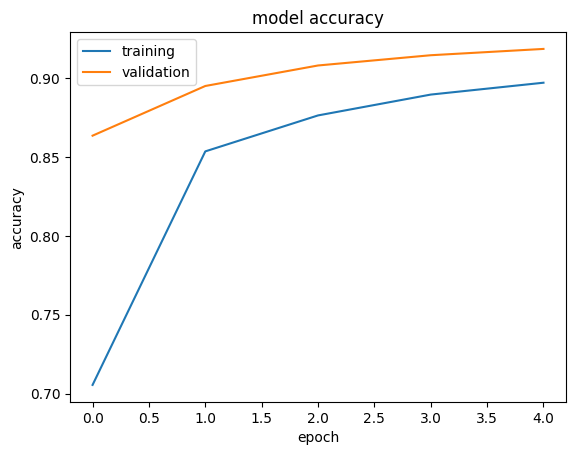

Test loss: 0.373
Test accuracy: 0.908


In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [14]:
print(  model.predict( np.array([x_train[42]]) ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[2.2594691e-03 4.6072225e-03 5.1356880e-03 3.4537087e-03 1.3738151e-03 2.7455571e-03 6.1698706e-04 8.5325974e-01 7.0653297e-03 1.1948248e-01]]


In [15]:
print( np.round( model.predict( np.array([x_train[42]]) ), decimals=2) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.   0.   0.01 0.   0.   0.   0.   0.85 0.01 0.12]]


In [16]:
print( np.round (model.predict( np.array([x_train[42]]) )))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [17]:
print( np.argmax( model.predict( np.array([x_train[42]]) )))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7
